In [2]:
import pandas as pd
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
    header=None)

In [6]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
le.transform(['M', 'B'])

array([1, 0])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1, solver='liblinear'))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy {:.3f}'.format(pipe_lr.score(X_test, y_test)))

Test Accuracy 0.947


In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=1)
scores = []

for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: {}, Class Dist : {}, Acc: {:.3f}'.format(k + 1, np.bincount(y_train[train]), score))

Fold: 1, Class Dist : [256 153], Acc: 0.891
Fold: 2, Class Dist : [256 153], Acc: 0.978
Fold: 3, Class Dist : [256 153], Acc: 0.978
Fold: 4, Class Dist : [256 153], Acc: 0.913
Fold: 5, Class Dist : [256 153], Acc: 0.935
Fold: 6, Class Dist : [257 153], Acc: 0.978
Fold: 7, Class Dist : [257 153], Acc: 0.933
Fold: 8, Class Dist : [257 153], Acc: 0.956
Fold: 9, Class Dist : [257 153], Acc: 0.978
Fold: 10, Class Dist : [257 153], Acc: 0.956


In [15]:
print('CV accuracy : {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy : 0.950 +/- 0.029


In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores : {}'.format(scores))

CV accuracy scores : [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [17]:
print("CV accuracy : {:.3f} +/- {:.3f}".format(np.mean(scores), np.std(scores)))

CV accuracy : 0.950 +/- 0.029


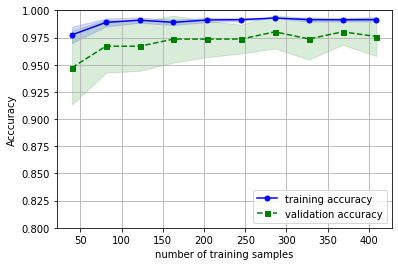

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('clf', LogisticRegression(penalty='l2', random_state=0, solver='liblinear'))])
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Acccuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

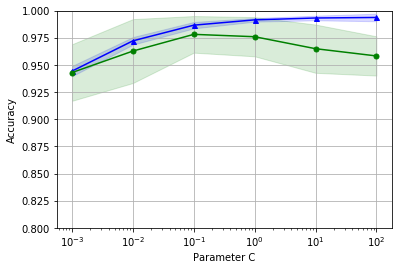

In [26]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C',
    param_range=param_range, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='^', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='o',
         markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, 
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.xscale('log')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc =  Pipeline([('scl', StandardScaler()),
                      ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  cv=10, n_jobs=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978021978
{'clf__C': 0.1, 'clf__kernel': 'linear'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: {:.3f}'.format(clf.score(X_test, y_test)))

Test accuracy: 0.965


In [33]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy', 
                 cv=2, n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy : {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy : 0.965 +/- 0.025


In [34]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.921 +/- 0.029


In [36]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


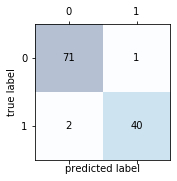

In [39]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: {:.3f}'.format(precision_score(y_true=y_test, y_pred=y_pred)))
print('Recall : {:.3f}'.format(recall_score(y_true=y_test, y_pred=y_pred)))
print('F1: {:.3f}'.format(f1_score(y_true=y_test, y_pred=y_pred)))

Precision: 0.976
Recall : 0.952
F1: 0.964


In [43]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)

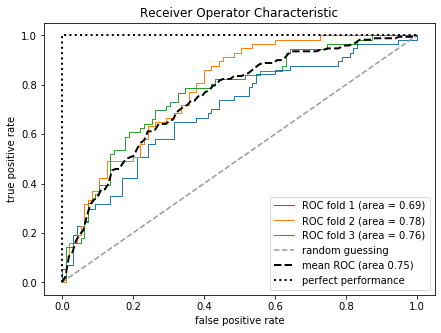

In [54]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0, solver='liblinear'))])
X_train2 = X_train[:, (4, 14)]
cv = StratifiedKFold(n_splits=3, random_state=1)
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv.split(X_train2, y_train)):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold {} (area = {:.2f})'.format(i + 1, roc_auc))
    
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= 3
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area {:.2f})'.format(mean_auc), lw = 2)
plt.plot([0, 0, 1],
         [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()